In [42]:
import pandas as pd

In [43]:
gpu_model = 'h100'
ai_model = '_llama3.3_demo'
inference_load = pd.read_csv(f"inference_load.agent_{gpu_model}{ai_model}.csv", parse_dates=['StartTime', 'EndTime'])
nvidia_log = pd.read_csv(f"nvidia_smi_log.agent_{gpu_model}{ai_model}.csv", parse_dates=['timestamp'])
default_inference_load = pd.read_csv(f"inference_load.default_{gpu_model}{ai_model}.csv", parse_dates=['StartTime', 'EndTime'])
default_nvidia_log = pd.read_csv(f"nvidia_smi_log.default_{gpu_model}{ai_model}.csv", parse_dates=['timestamp'])

In [44]:
#get total timespace from inference_load; we will only count from start of first inference to end of last
end_time = inference_load['EndTime'].max() 
start_time = inference_load['StartTime'].min()
total_time = end_time - start_time  
print(f"Total time (agent): {total_time}")

Total time (agent): 0 days 00:01:33.487000


In [45]:
#get total timespace from inference_load; we will only count from start of first inference to end of last
default_end_time = default_inference_load['EndTime'].max() 
default_start_time = default_inference_load['StartTime'].min()
default_total_time = default_end_time - default_start_time  
print(f"Total time (default): {default_total_time}")

Total time (default): 0 days 00:01:18.377000


In [46]:
#filter nvidia log to only include data from start of first inference to end of last
nvidia_log = nvidia_log[(nvidia_log['timestamp'] >= start_time) & (nvidia_log['timestamp'] <= end_time)]
default_nvidia_log = default_nvidia_log[(default_nvidia_log['timestamp'] >= default_start_time) & (default_nvidia_log['timestamp'] <= default_end_time)]

In [47]:
#calculate total watt-seconds of each row
nvidia_log['time_since_last'] = nvidia_log['timestamp'].diff().dt.total_seconds()
nvidia_log['watt_seconds'] = nvidia_log['power.draw(W)'] * nvidia_log['time_since_last']
nvidia_log.head()

 


,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
3,2025-01-25 19:19:22.025,0,NVIDIA H100 80GB HBM3,0,0,81559,36668,44328,31,345,2619,700.0,69.78,NaN,NaN
4,2025-01-25 19:19:22.145,0,NVIDIA H100 80GB HBM3,0,0,81559,36664,44332,31,345,2619,700.0,70.52,0.120,8.46240
5,2025-01-25 19:19:22.268,0,NVIDIA H100 80GB HBM3,51,3,81559,36664,44332,32,345,2619,700.0,74.95,0.123,9.21885
6,2025-01-25 19:19:22.388,0,NVIDIA H100 80GB HBM3,51,3,81559,36664,44332,32,345,2619,700.0,79.40,0.120,9.52800
7,2025-01-25 19:19:22.506,0,NVIDIA H100 80GB HBM3,96,7,81559,36664,44332,32,345,2619,700.0,85.19,0.118,10.05242


In [48]:
#calculate total watt-seconds of each row
default_nvidia_log['time_since_last'] = default_nvidia_log['timestamp'].diff().dt.total_seconds()
default_nvidia_log['watt_seconds'] = default_nvidia_log['power.draw(W)'] * default_nvidia_log['time_since_last']
default_nvidia_log.head()

,timestamp,index,name,utilization.gpu(%),utilization.memory(%),memory.total(MiB),memory.free(MiB),memory.used(MiB),temperature.gpu(C),gpu.frequency(Ghz),vram.frequency(Ghz),power.limit(W),power.draw(W),time_since_last,watt_seconds
7,2025-01-25 19:40:29.498,0,NVIDIA H100 80GB HBM3,0,0,81559,36640,44356,32,1980,2619,700.0,118.24,NaN,NaN
8,2025-01-25 19:40:29.615,0,NVIDIA H100 80GB HBM3,42,17,81559,36640,44356,35,1980,2619,700.0,158.39,0.117,18.53163
9,2025-01-25 19:40:29.732,0,NVIDIA H100 80GB HBM3,42,17,81559,36640,44356,40,1980,2619,700.0,207.37,0.117,24.26229
10,2025-01-25 19:40:29.848,0,NVIDIA H100 80GB HBM3,88,62,81559,36640,44356,43,1980,2619,700.0,251.01,0.116,29.11716
11,2025-01-25 19:40:29.966,0,NVIDIA H100 80GB HBM3,88,62,81559,36640,44356,44,1980,2619,700.0,306.31,0.118,36.14458


<Axes: >

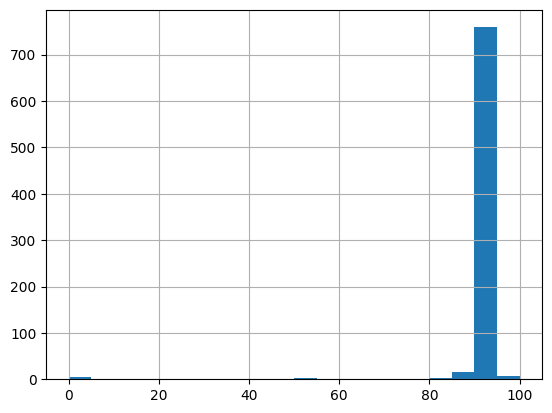

In [49]:
#show histogram of time spent in different gpu load levels
nvidia_log['utilization.gpu(%)'].hist(bins=20)

<Axes: >

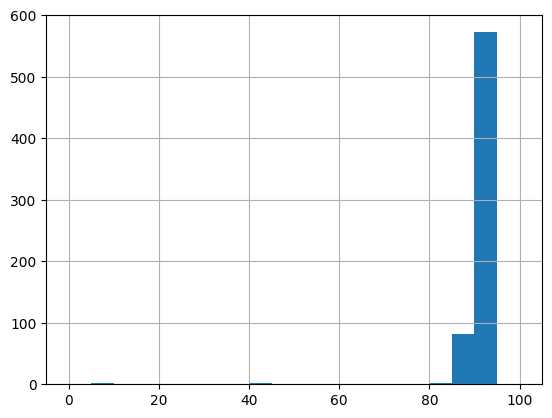

In [50]:
default_nvidia_log['utilization.gpu(%)'].hist(bins=20)

In [51]:
#print total watt-seconds
total_watt_seconds = nvidia_log['watt_seconds'].sum()
print(f"Total watt-seconds (agent): {total_watt_seconds}")
default_total_watt_seconds = default_nvidia_log['watt_seconds'].sum()
print(f"Total watt-seconds (default): {default_total_watt_seconds}")

Total watt-seconds (agent): 41728.749579999996
Total watt-seconds (default): 46346.976689999996


In [52]:
#print total tokens
total_tokens = inference_load['TotalTokens'].sum()
print(f"Total tokens (agent): {total_tokens}")
default_total_tokens = default_inference_load['TotalTokens'].sum()
print(f"Total tokens (default): {default_total_tokens}")

Total tokens (agent): 3541
Total tokens (default): 3384


In [53]:
#create a table with columns for total time, total watt-seconds, total tokens and tokens per watt-second and tokens per second
summary = pd.DataFrame(columns=['total_time', 'total_watt_seconds', 'total_tokens', 'tokens_per_watt_second', 'tokens_per_second'])
summary.loc['agent'] = [total_time, total_watt_seconds, total_tokens, total_tokens/total_watt_seconds, total_tokens/total_time.total_seconds()]
summary.loc['default'] = [default_total_time, default_total_watt_seconds, default_total_tokens, default_total_tokens/default_total_watt_seconds, default_total_tokens/default_total_time.total_seconds()]
summary


,total_time,total_watt_seconds,total_tokens,tokens_per_watt_second,tokens_per_second
agent,0 days 00:01:33.487000,41728.74958,3541,0.084858,37.876924
default,0 days 00:01:18.377000,46346.97669,3384,0.073014,43.175932


In [54]:
#calculate percent diff in total_watt_seconds and tokens_per_second
percent_diff_total_watt_seconds = (total_watt_seconds - default_total_watt_seconds) / default_total_watt_seconds * 100
percent_diff_tokens_per_second = (summary.loc['agent']['tokens_per_second'] - summary.loc['default']['tokens_per_second']) / summary.loc['default']['tokens_per_second'] * 100
percent_diff_tokens_per_watt_second = (summary.loc['agent']['tokens_per_watt_second'] - summary.loc['default']['tokens_per_watt_second']) / summary.loc['default']['tokens_per_watt_second'] * 100
print(f"Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): {percent_diff_total_watt_seconds}")
print(f"Percent diff in agent from default in tokens per second: {percent_diff_tokens_per_second}")
print(f"Percent diff in agent from default in tokens per watt-second: {percent_diff_tokens_per_watt_second}")

Percent diff in agent from default in total watt-seconds (don't take too much from this as this isn't normalized): -9.964462495342111
Percent diff in agent from default in tokens per second: -12.273059178832732
Percent diff in agent from default in tokens per watt-second: 16.220197941311724
